<a href="https://colab.research.google.com/github/ShreyasSupnekar/GenAI_Learnings/blob/main/GenAi_Basics_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Python SDK

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 17.7 MB/s eta 0:00:00


Import Packages

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text=text.replace('•','*')
  return Markdown(textwrap.indent(text, '>', predicate=lambda _: True))

In [ ]:
#Used to securely store your API Key
from google.colab import userdata

Setup API Key

In [ ]:
#Or use 'os.getenv('GOOGLE_API_KEY')' to fetch an environment variable
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

List Models

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


Generate Texts from Text Inputs

In [ ]:
model=genai.GenerativeModel('gemini-pro')

In [ ]:
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [ ]:
response=model.generate_content("What is the meaning of life?")

In [ ]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "The meaning of life is a deeply personal question that has been pondered by philosophers, religious leaders, and individuals throughout history. There is no one definitive answer that can encompass the diverse perspectives and beliefs of humanity. However, some common themes and ideas have emerged:\n\n**Purpose and Fulfillment:**\n\n* Many individuals find meaning in pursuing a purpose or goal that gives their life direction and a sense of accomplishment. This purpose can be something as grand as making a significant contribution to society or as personal as nurturing relationships or pursuing passions.\n\n**Values and Principles:**\n\n* Living according to one's values and principles can provide a sense of meaning and fulfillment. These values can guide dec

In [ ]:
response.text

"The meaning of life is a deeply personal question that has been pondered by philosophers, religious leaders, and individuals throughout history. There is no one definitive answer that can encompass the diverse perspectives and beliefs of humanity. However, some common themes and ideas have emerged:\n\n**Purpose and Fulfillment:**\n\n* Many individuals find meaning in pursuing a purpose or goal that gives their life direction and a sense of accomplishment. This purpose can be something as grand as making a significant contribution to society or as personal as nurturing relationships or pursuing passions.\n\n**Values and Principles:**\n\n* Living according to one's values and principles can provide a sense of meaning and fulfillment. These values can guide decision-making, shape actions, and create a sense of alignment between internal beliefs and external behavior.\n\n**Relationships and Connections:**\n\n* Human beings are social creatures, and meaningful relationships play a crucial 

In [ ]:
response=model.generate_content("What is the meaning of life?", stream=True)

In [ ]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The meaning of life is a deep philosophical question that has been pondered by humans for
________________________________________________________________________________
 centuries. There is no one definitive answer, and the meaning of life is likely to be different for each individual. However, some possible meanings of life include:
________________________________________________________________________________


* To find happiness and fulfillment
* To make a difference in the world
* To learn and grow
* To connect with others
* To be creative
* To experience the beauty of life

Ultimately, the meaning of life is whatever you make it. There is no right or wrong answer, and the
________________________________________________________________________________
 best way to find your own meaning is to explore your interests and values and live a life that is true to yourself.

Here are some quotes from famous people about the meaning of life:

* "The meaning of life is to give life mea

Generate text from image and text inputs

In [ ]:
!curl -o image.jpg https://www.licious.in/blog/wp-content/uploads/2022/11/shutterstock_699727969.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  669k  100  669k    0     0   455k      0  0:00:01  0:00:01 --:--:--  454k


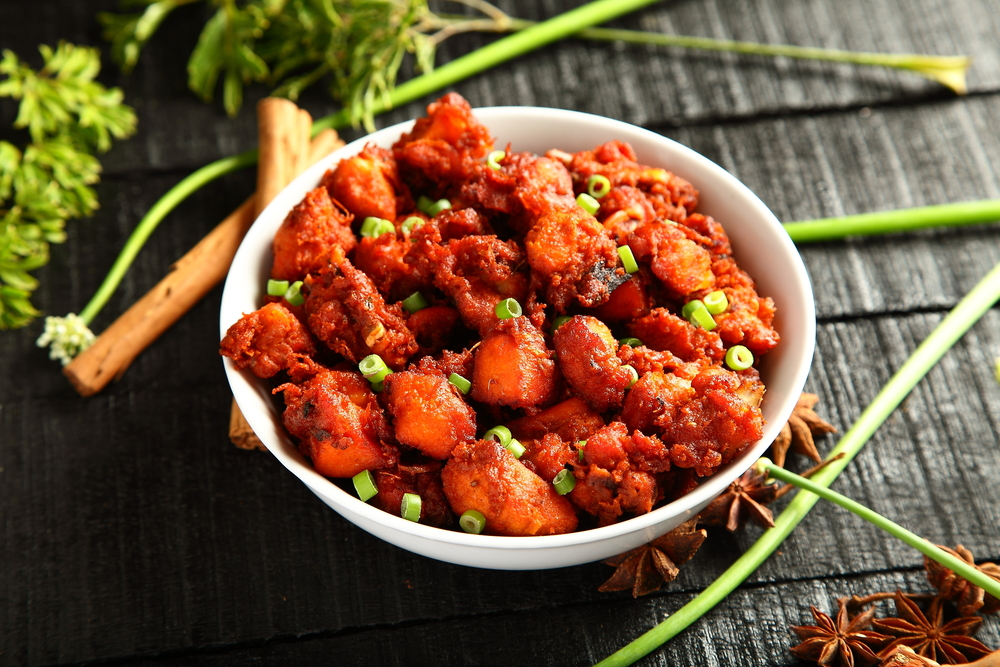

In [ ]:
import PIL.Image

img=PIL.Image.open('image.jpg')
img

Use the gemini -pro -vision model and pass the image to the model with generate_content

In [ ]:
model=genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response=model.generate_content(img)
to_markdown(response.text)

> This is a picture of Chicken 65. It is a popular Indian dish made with chicken, spices, and yogurt. The chicken is marinated in yogurt and spices, then fried until crispy. It is often served as an appetizer or snack.

To provide both text and images in a prompt , pass a list containing the strings and images:

In [ ]:
response=model.generate_content(["Write a short, engaging blog post on this picture in english.", img], stream=True)
response.resolve()

In [ ]:
to_markdown(response.text)

> **Crispy Chilli Chicken**
>
>Crispy Chilli Chicken is a popular Indo-Chinese appetizer or snack. It is made with bite-sized pieces of chicken that are coated in a batter and fried until crispy. The chicken is then tossed in a sweet and spicy chilli sauce.
>
>This dish is a great way to start a meal or as a party snack. It is sure to please everyone with its crispy texture and delicious flavor.
>
>If you are looking for a new and exciting way to enjoy chicken, then you should definitely try Crispy Chilli Chicken. It is easy to make and it is sure to be a hit!
>
>Here is a recipe for Crispy Chilli Chicken:
>
>Ingredients:
>
>* 1 pound boneless, skinless chicken breasts, cut into 1-inch pieces
>* 1/2 cup all-purpose flour
>* 1 teaspoon cornstarch
>* 1 teaspoon baking powder
>* 1/2 teaspoon salt
>* 1/4 teaspoon black pepper
>* 1 egg
>* 1/2 cup vegetable oil
>* 1/4 cup soy sauce
>* 1/4 cup rice vinegar
>* 1/4 cup ketchup
>* 1 tablespoon honey
>* 1 teaspoon Sriracha sauce
>* 1/4 teaspoon garlic powder
>* 1/4 teaspoon onion powder
>* 1/4 teaspoon ground cumin
>* 1/4 teaspoon ground coriander
>* 1/4 teaspoon ground turmeric
>* 1/4 teaspoon garam masala
>* 1/4 teaspoon red chili powder
>* 1/4 teaspoon black pepper
>* 1/4 teaspoon salt
>* 1/4 cup chopped cilantro leaves
>* 1/4 cup chopped green onions
>
>Instructions:
>
>1. In a large bowl, combine the chicken, flour, cornstarch, baking powder, salt, and pepper. Toss to coat the chicken evenly.
>2. In a separate bowl, whisk together the egg and 1/4 cup of water. Add the egg mixture to the chicken and toss to coat.
>3. Heat the oil in a large skillet over medium heat. Add the chicken and cook until browned on all sides. Remove the chicken from the skillet and drain on paper towels.
>4. In a small bowl, combine the soy sauce, rice vinegar, ketchup, honey, Sriracha sauce, garlic powder, onion powder, cumin, coriander, turmeric, garam masala, red chili powder, black pepper, and salt. Stir until well combined.
>5. Add the chicken back to the skillet and pour the sauce over it. Bring to a boil, then reduce heat and simmer for 5 minutes, or until the sauce has thickened and the chicken is cooked through.
>6. Stir in the cilantro and green onions. Serve immediately.